In [34]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
batch_size = 32
image_size = (150, 150)  # Adjust the size as needed

data_dir='/kaggle/working/dataset'
train=keras.utils.image_dataset_from_directory(data_dir,image_size=image_size,
                                                validation_split=0.1,
                                                label_mode='categorical',
                                                subset='training',seed=123)
val=keras.utils.image_dataset_from_directory(data_dir,image_size=image_size,
                                             label_mode = 'categorical',
                                                validation_split=0.2,
                                                subset='validation',seed=123)


Found 4200 files belonging to 2 classes.
Using 3780 files for training.
Found 4200 files belonging to 2 classes.
Using 840 files for validation.


In [36]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [37]:
from keras.layers import Input

input_layer = Input(shape=(150, 150, 3))  # Input layer with the desired shape

VGG_model = Sequential()

pretrained_model = keras.applications.VGG16(include_top=False,
                   input_shape=(150, 150, 3),
                   pooling='max', classes=4,
                   weights='imagenet')

VGG_model.add(input_layer)  # Add the input layer
VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(256, activation='gelu'))
VGG_model.add(BatchNormalization())
VGG_model.add(Dropout(0.25))
VGG_model.add(Dense(2, activation='softmax'))
pretrained_model.trainable = False


In [38]:
VGG_model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss=keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [39]:
VGG_model.fit(train,epochs=6,
                 validation_data=val)

Epoch 1/6
119/119 [==============================] - 14s 96ms/step - loss: 0.2622 - accuracy: 0.8884 - val_loss: 0.1262 - val_accuracy: 0.9988
Epoch 2/6
119/119 [==============================] - 12s 93ms/step - loss: 0.0588 - accuracy: 0.9854 - val_loss: 0.0735 - val_accuracy: 0.9976
Epoch 3/6
119/119 [==============================] - 12s 93ms/step - loss: 0.0421 - accuracy: 0.9902 - val_loss: 0.0376 - val_accuracy: 0.9976
Epoch 4/6
119/119 [==============================] - 12s 98ms/step - loss: 0.0219 - accuracy: 0.9968 - val_loss: 0.0138 - val_accuracy: 0.9976
Epoch 5/6
119/119 [==============================] - 12s 94ms/step - loss: 0.0306 - accuracy: 0.9913 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 6/6
119/119 [==============================] - 12s 95ms/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.0031 - val_accuracy: 1.0000


In [40]:
VGG_model.save("tuberculosis.h5")

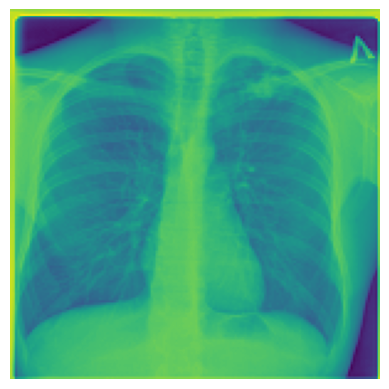

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# Replace 'your_image_path.png' with the actual path of your PNG image file
image_path = '/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-100.png'

# Load the PNG image using Matplotlib
img = mpimg.imread(image_path)

# Resize the image to 150x150 pixels
resized_img = cv2.resize(img, (150, 150))

# Display the resized image using Matplotlib
plt.imshow(resized_img)
plt.axis('off')  # Turn off axis labels
plt.show()


In [42]:
!pip install pillow

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Load the pre-trained model (example: VGG16)
 
# Replace 'your_image_path.jpg' with the actual path of your image file
image_path = '/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal/Normal-100.png'

# Load and preprocess the input image
img = image.load_img(image_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction
predictions = VGG_model.predict(img_array)

 

1/1 [==============================] - 0s 208ms/step


In [44]:
print(predictions)

[[1. 0.]]


In [45]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the pre-trained model (example: VGG16)
model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)

# Replace 'your_directory_path' with the actual path to your image directory
directory_path = '/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(directory_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
image_files  = image_files[:500]
# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Process each image and collect true and predicted labels
for image_file in image_files:
    # Create the full path to the image
    image_path = os.path.join(directory_path, image_file)

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(150,150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get the true label from the image file name (assuming file names represent labels)
    true_label = image_file.split('.')[0]  # Extract label from filename
    true_labels.append(true_label)

    # Make a prediction
    predictions = VGG_model.predict(img_array, verbose=0)

    # Get the predicted label (you might need to adapt this based on your model architecture)
#     predicted_label = tf.keras.applications.vgg16.decode_predictions(predictions)[0][0][1]
    predicted_labels.append(predictions)

# Convert true labels and predicted labels to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate accuracy
accuracy = np.mean(np.array_equal(true_labels, np.argmax(predicted_labels, axis=1)))

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 0.00%


In [46]:
print("hello")

array(['Tuberculosis-521', 'Tuberculosis-106', 'Tuberculosis-25',
       'Tuberculosis-574', 'Tuberculosis-613', 'Tuberculosis-124',
       'Tuberculosis-453', 'Tuberculosis-148', 'Tuberculosis-339',
       'Tuberculosis-158', 'Tuberculosis-248', 'Tuberculosis-129',
       'Tuberculosis-639', 'Tuberculosis-350', 'Tuberculosis-47',
       'Tuberculosis-51', 'Tuberculosis-527', 'Tuberculosis-159',
       'Tuberculosis-429', 'Tuberculosis-356', 'Tuberculosis-500',
       'Tuberculosis-402', 'Tuberculosis-530', 'Tuberculosis-191',
       'Tuberculosis-387', 'Tuberculosis-493', 'Tuberculosis-495',
       'Tuberculosis-507', 'Tuberculosis-167', 'Tuberculosis-411',
       'Tuberculosis-297', 'Tuberculosis-17', 'Tuberculosis-383',
       'Tuberculosis-628', 'Tuberculosis-229', 'Tuberculosis-664',
       'Tuberculosis-200', 'Tuberculosis-162', 'Tuberculosis-145',
       'Tuberculosis-591', 'Tuberculosis-443', 'Tuberculosis-63',
       'Tuberculosis-593', 'Tuberculosis-691', 'Tuberculosis-355',


In [47]:
above_threshold = predicted_labels[:, 0, 0] > 0.5

# Count how many elements satisfy the condition
count_above_threshold = np.sum(above_threshold)

print(f"Number of elements with the first number above 0.8: {count_above_threshold}")

Number of elements with the first number above 0.8: 0


In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Load the pre-trained model (example: VGG16)
 
# Replace 'your_image_path.jpg' with the actual path of your image file
image_path = '/kaggle/input/clahe-lungs/clahe/Tuberculosis-104.png'

# Load and preprocess the input image
img = image.load_img(image_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction
predictions = VGG_model.predict(img_array)

 

1/1 [==============================] - 0s 20ms/step


In [56]:
print((img.size))

(150, 150)
